In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

### Introducción

Antes de implementar cualquier modelo, recordemos las distribuciones de nuestras variables: La mayoría de ellas, seguían una distribución casi exponencial y algunas multinomial. Sin embargo, aquellas multinomiales corresponded a las variables ordinales de nuestro data set, las cuales estaban altamente correladas entre si y fueron descartadas al aplicar PCA.

Por ello sea cual sea nuestro modelo de naive bayes, lo más probable es que optemos por una transformación de nuestros datos para poder generar un modelo con sentido.

### ¿Para qué queremos aplicar Naive Bayes?

Buscamos clasificar de la forma más precisa posible nuetsras tres clases de income: bajo, medio, alto, que a partir de ahora, determinaremos como 0, 1 y 2 para poder tratar con ellos en el modelo.

### ¿Por qué aplicar este modelo a nuestros datos?

Entre sus pros, destacar que computacionalmente es bastante rápido y fácil de implementar, lo que para un data set de 7000 muestras, alivia bastante el tiempo de trabajo. 

Sin embargo, un punto en contra que afecta directamente en nuestro dataset es la asumción de independencia entre variables. Recordemos que uno de los problemas de nuestras variables, que eran bastantes que que muchas de ellas estaban altamente correladas, y eso afectaba directamente a nuestros modelos. Por suerte, tras aplicar reducciones de dimensionalidad, conseguimos quedarnos con las 4 variables más influyentes de nuestra variable predictora, reduciendo notablemente la correlación entre variables

Por otro lado, en el hipotético caso de que nuestro set de datos train no cogiera alguna de las categorías de nuestra variables target (e.g categoria baja) el modelo asignaría probabilidad 0 en el set de test y nuestro modelo perdería eficacia. Sktlearn aplica un suavizado de laplace al entrenar el calsificador naive bayes


In [2]:
data = pd.read_csv("datos-new.csv")

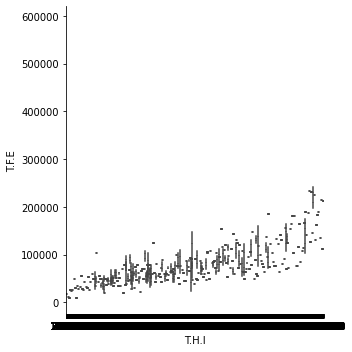

In [27]:
sns.catplot(x="T.H.I", y="T.F.E", kind="box", data=data);

In [3]:
def inc_groups(series):
    if series < 350000:
        return 1
    elif 350000 <= series < 700000:
        return 2
    elif 700000 <= series:
        return 3

data['T.H.I'] = data['T.H.I'].apply(inc_groups)


### ¿Por qué esta división?

* Podemos ver que hay muchos datos atípicos

* La mayoría de nuestras muestras se centran en el rangos de income y gastos bajos (recordemos que es una poblaciṕn poble)

* (...) 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

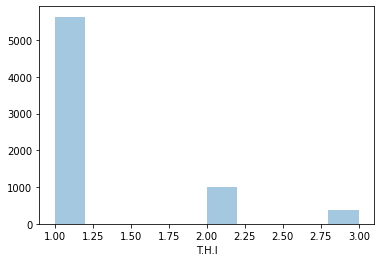

In [24]:
sns.distplot(data['T.H.I'], kde=False, bins=10);

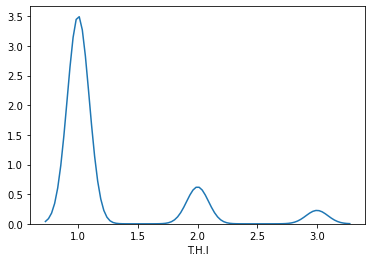

In [18]:
sns.distplot(data['T.H.I'],hist=False, bins=10);

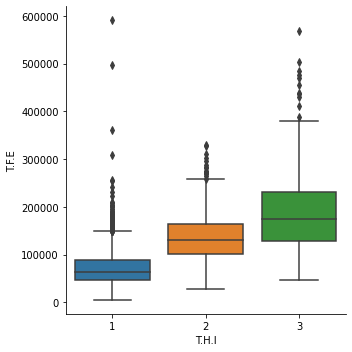

In [25]:
sns.catplot(x="T.H.I", y="T.F.E", kind="box", data=data);

In [5]:
y = data[['T.H.I']]
# precio de venta de la casa, gastos de lujo, bienes y servicios, gastos comida)
X = data[['BYS','T.F.E']]
X2 = data[['I.H.R.V','GL']]

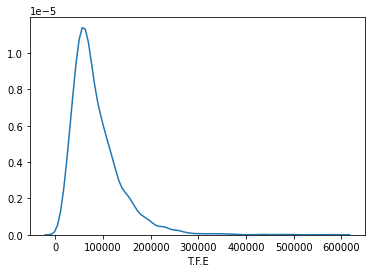

In [99]:
sns.distplot(data['T.F.E'],hist=False, bins=10);

Nos disponemos a normalizar nuestros datos con la f

In [83]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)
Xs = pd.DataFrame(data=Xs, columns=['I.H.R.V','GL','BYS','T.F.E'])

Me he estado peleando para transformar nuestras distribuciones a una normal con boxcoc de scypy pero es horrible. Tengo que pasarlo a array y a 1 dimensión y luego intentar reconvertirlo a algo con sentido para pasarselo a mis datos de train y test más el modelo.

he optado a utilizar la transformación logarítmica. Si alguien tiene alguna aproximación mejor, que lo aplique por favor :)

In [85]:
#transform = np.asarray(X.values)
#transform = transform.flatten()
#transform.ndim

In [78]:
#from sklearn import preprocessing
#from scipy import stats
#Xs = stats.boxcox(transform)
#Xs = pd.DataFrame(data=Xs, columns=['I.H.R.V','GL','BYS','T.F.E'])

In [7]:
logd = np.log(X)

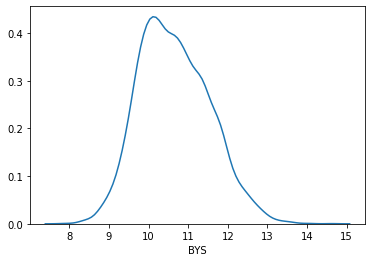

In [8]:
sns.distplot(logd['BYS'],hist=False, bins=10);

In [10]:
result = pd.concat([X, X2], axis=1)
print(result.head())

      BYS   T.F.E  I.H.R.V      GL
0  314680  204969    90000  116090
1   33572   50545     4500    1470
2  137586   74240    90000   14420
3   25505   57793     7200    5115
4  164540   87578        0   56861


In [15]:
xTrain, xVal, yTrain, yVal = train_test_split(logd, y, test_size=0.20, random_state=1, stratify=y)

xTrain, xTest, yTrain, yTest = train_test_split(xTrain, yTrain, test_size=0.30, random_state=1, stratify=yTrain)

datos_validacion = pd.concat([yVal, xVal], axis=1)
datos_train = pd.concat([yTrain, xTrain], axis=1)
datos_test = pd.concat([yTest, xTest], axis=1)

## Naive Bayes con modelo gausiano

Nuestro objetivo será clasificar de la forma más precisa posible 

El clasificador de Naive bayes que vamos a utilizar es el gausiano, el cual:

* Asume que nuestras variables predictoras (bienes y servicios, consumo en comida, gastos de lujo y precio de venta de la casa) son independientes

* Asume que los datos siguen una distribución normal

Sacaremos la distribución de cada una de nuestras variables predictoras y las modelamos con una gausiana, es decir normalizar cada una de esas distribuciones. Cuando ya tenemos nuestra curva de distribuciones normalizadas en cada una de las variables, juntamos todas nuestras gausianas multiplicándolas

Cuando finalmente utilicemos nuestro clasificador para determinar a qué clase pertenece un nuevo valor, deberemos de calcular las probablilidades en el modelo de cada una de nuestras clases (bajo, medio, alto). 

In [ ]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X)
#Xs = scaler.transform(X)
#Xs = pd.DataFrame(data=Xs, columns=['I.H.R.V','GL','BYS','T.F.E'])

Naive Bayes funciona muy bien para datos con grandes cantidades de datos y tiene una ejecución bastante rápida frente a otros modelos, como por ejemplo las SVM.

In [16]:
#predictors = ['I.H.R.V','GL','BYS','T.F.E']

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

model = GaussianNB()
model.fit(xTrain, yTrain)

y_pred = model.predict(xTest)

/home/anajs/.local/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
print(model.predict(yTest))

[1 1 1 ... 1 1 1]


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

print(confusion_matrix(yTest,y_pred))

print(classification_report(yTest,y_pred))

[[1245  108    0]
 [  40  185   15]
 [   2   27   58]]
              precision    recall  f1-score   support

           1       0.97      0.92      0.94      1353
           2       0.58      0.77      0.66       240
           3       0.79      0.67      0.72        87

    accuracy                           0.89      1680
   macro avg       0.78      0.79      0.78      1680
weighted avg       0.90      0.89      0.89      1680



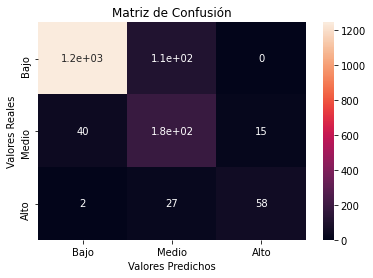

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt  

labels = [1, 2, 3]

cm = confusion_matrix(yTest, y_pred, labels)
fig = plt.figure()
  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Valores Predichos');ax.set_ylabel('Valores Reales'); 
ax.set_title('Matriz de Confusión'); 
ax.xaxis.set_ticklabels(['Bajo', 'Medio', 'Alto']); ax.yaxis.set_ticklabels(['Bajo', 'Medio', 'Alto']);